In [69]:
import csv
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# CSV 파일 경로(train / test)
file_path_train = '/content/drive/My Drive/train.csv'
file_path_test = '/content/drive/My Drive/test.csv'


# train CSV 파일 읽기
df_train = pd.read_csv(file_path_train)

# test CSV 파일 읽기
df_test = pd.read_csv(file_path_test)

# 데이터 출력(잘 들어왔는지 확인)
df_train.head()  # 처음 다섯 줄 출력

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


survival	Survival	0 = No, 1 = Yes  
pclass	Ticket class(티켓 등급)	1 = 1st, 2 = 2nd, 3 = 3rd  
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic     
-> 타이타닉호에 타고 있는 배우자 수
parch	# of parents / children aboard the Titanic
-> 타이타닉호에 탑승한 부모/자녀
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number	-> 선실 숫자  
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
-> 탑승자 이름 앞글자


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.shape   # (891, 12)

(891, 12)

In [11]:
df_test.shape   # (418, 11) , survided가 없음

(418, 11)

In [14]:
df_train.isnull().sum()    # Age, Cabin, Embarked 에 null 존재

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df_test.isnull().sum()    # Age, Fare, Cabin 에 null 존재

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
columns = df_train.columns
print(columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


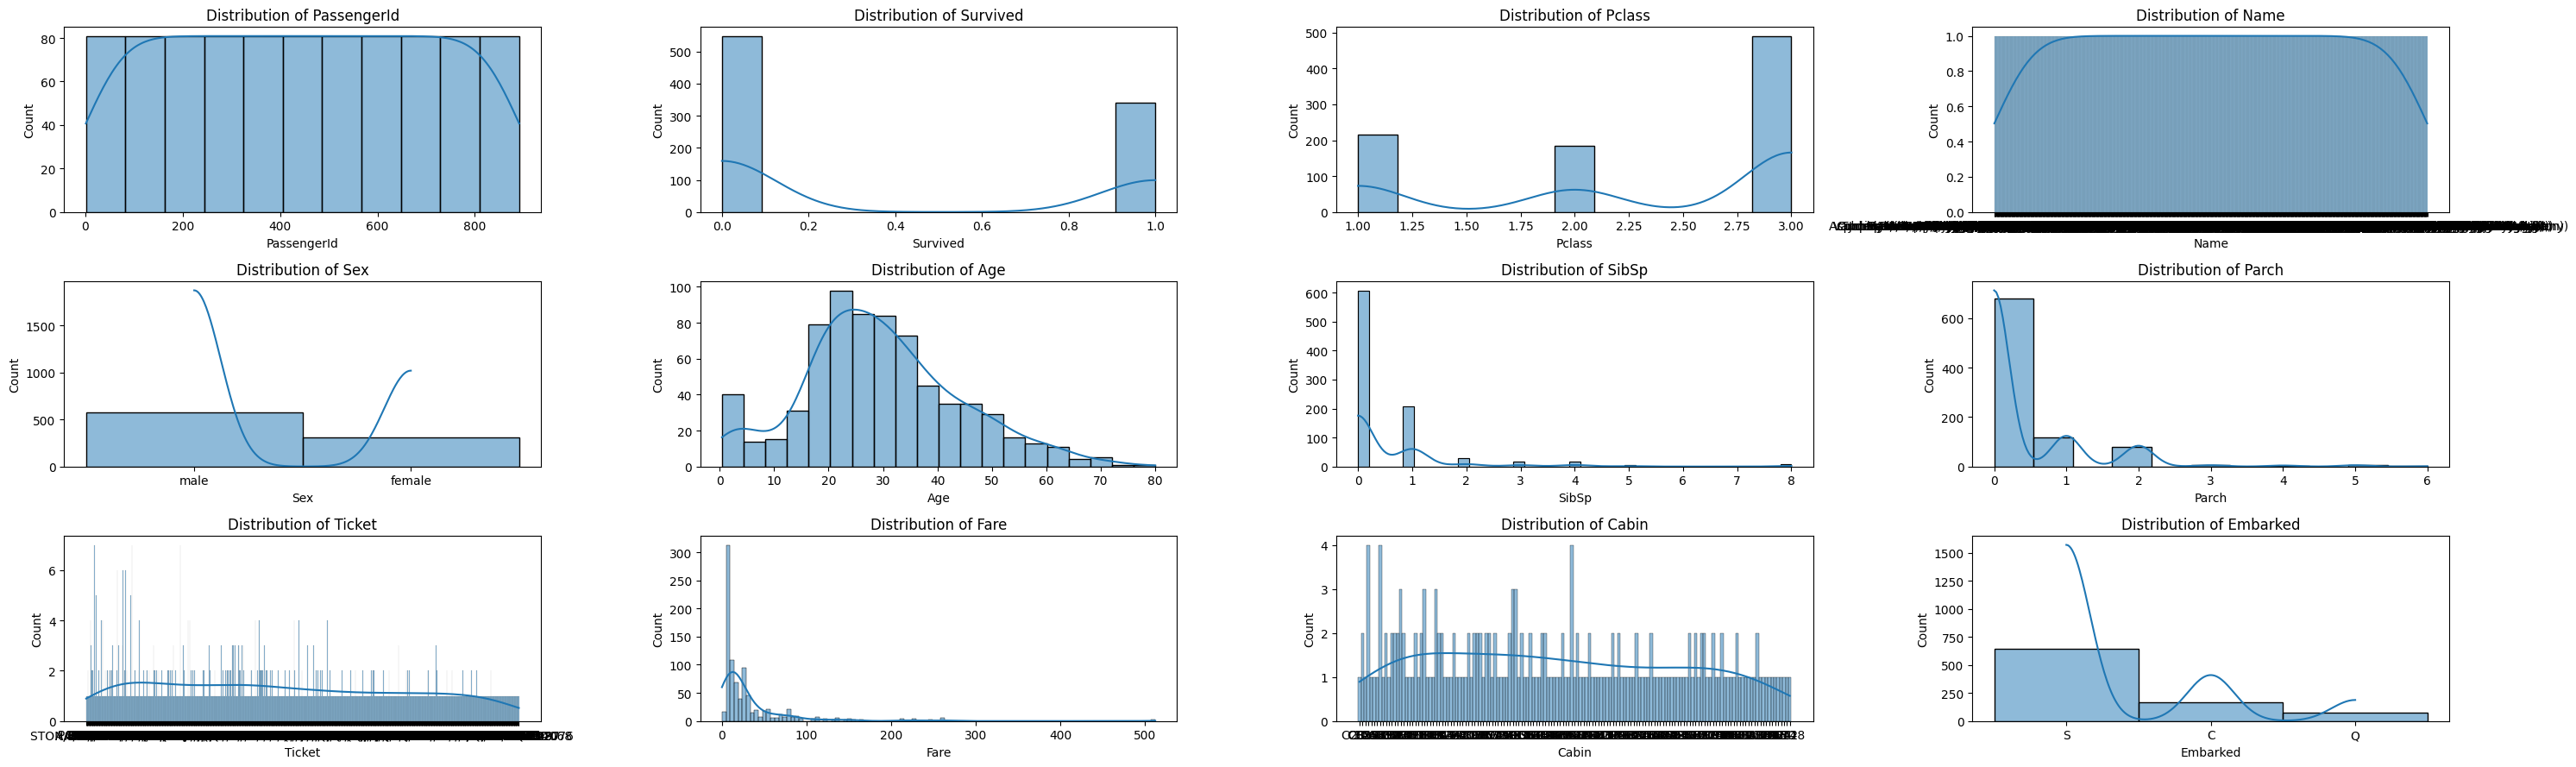

In [ ]:
import matplotlib.pyplot as plt
import math
import seaborn as sns

columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


# 그래프의 크기 및 행, 열 설정
num_cols_count = len(columns)
num_cols_per_row = 4  # 각 행당 그래프 수를 조절
num_rows = int(math.ceil(num_cols_count / num_cols_per_row))

plt.figure(figsize=(30, 3 * num_rows))

for i, feature in enumerate(columns, 1):
    plt.subplot(num_rows, num_cols_per_row, i)
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# 그래프 출력
plt.tight_layout()
plt.show()

<ipython-input-42-bd8dc4be6ee9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


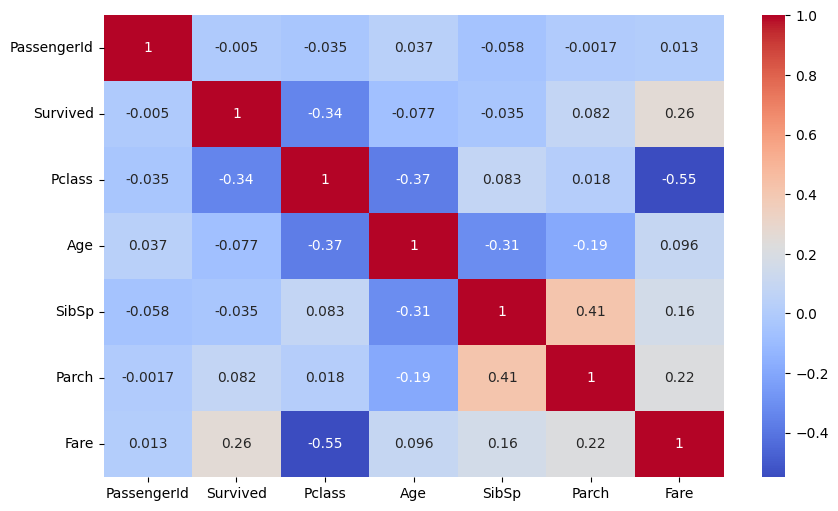

In [ ]:
df = pd.DataFrame(df_train)

# 모든 열 간의 상관관계 계산
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # 히트맵 생성
plt.show()

# survided 비율 보기

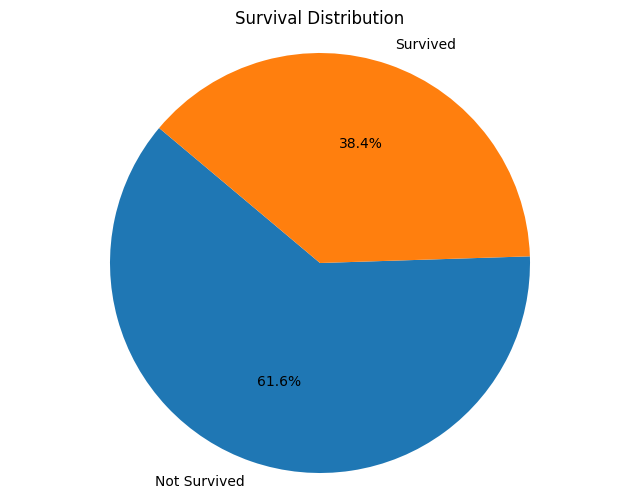

In [16]:
# 'survived' 열의 값에 따른 데이터 그룹화
survived_counts = df_train['Survived'].value_counts()

# 원형 그래프 그리기
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140)
plt.title('Survival Distribution')
plt.axis('equal')  # 원이 둥그런 형태가 되도록 하는 옵션
plt.show()

### 필요없는거 버리기

In [17]:
df_train = df_train.drop(['Name', 'Ticket', 'Cabin','Embarked','Fare'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Cabin','Embarked', 'Fare'], axis=1)

### 성별을 숫자로 변환(범주형 데이터 -> 숫자형 데이터)

In [18]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'Sex' 열의 값에 대해 Label Encoding 적용
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])

# 변환된 값 확인
print(df_train['Sex'])
print(df_test['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


### 데이터 결측치 채우기

* 평균

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

from sklearn.impute import SimpleImputer

# SimpleImputer 객체 생성
imputer = SimpleImputer(strategy='mean')

# Age 열에 대해 결측치를 평균값으로 대체
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.transform(df_test[['Age']])

# 실수를 정수로 변환
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

- 중앙값(그래프가 정규분포 형태를 띄고 있으며 약간 왼쪽으로 치우쳐져 있음)

In [26]:
from sklearn.impute import SimpleImputer

# SimpleImputer 객체 생성
imputer = SimpleImputer(strategy='median')

# Age 열에 대해 결측치를 중앙값으로 대체
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.transform(df_test[['Age']])

# 실수를 정수로 변환
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

# Null값 재확인

In [27]:
df_train.isnull().sum()    # null 없음

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [28]:
df_test.isnull().sum()   # null 없음

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

### 테스트 결과

In [29]:
df_test.shape

# 테스트 데이터에서 입력 변수(X_test) 추출
X_test = df_test  # 테스트 데이터에서 생존 여부(Survived) 열을 제외하고 모든 열을 사용

- train 데이터 평가

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define numerical and categorical features
numerical_features = ['Age']   # 숫자형
categorical_features = ['Sex']  # 범주형

# Create preprocessing pipeline : 전처리 파이프라인 생성
# Pipeline 클래스를 사용하여 numerical 및 categorical feature에 대한 전처리 파이프 라인을 생성
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # 결측값을 평균값으로 채우기(Age)
    ('scaler', StandardScaler())
])

# Age를 중앙값으로 해보기(mean, median) 비교해보기

# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),   # 결측값을 평균값으로 채우기(Age)
#     ('scaler', StandardScaler())
# ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 가장 빈번한 값으로 채우기(Sex)
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define model
model = RandomForestClassifier(random_state=42)

# Create full pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split data into features and target
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict on validation set
y_pred = pipeline.predict(X_val)

# Evaluate model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.776536312849162
F1 Score: 0.7222222222222223
Recall: 0.7027027027027027
Precision: 0.7428571428571429


- 파이프 라인을 쓰는 이유 : 전처리부터 학습 과정까지 각 단계의 과정을 정확한 순서대로 할 수 있어서

> 파이프 라인의 목적은 cross_validated(교차 검증 가능한) 여러가지의 단계들을 합쳐놓은 것이다.

- 확인 필요

# 성능 평가

In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Drop unnecessary columns
train_data = df_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis=1)

# Split train data into features and target
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

# Define numerical and categorical features
numerical_features = ['Age']
categorical_features = ['Sex']

# Create preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define model
model = RandomForestClassifier(random_state=42)

# Create full pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train model
pipeline.fit(X_train, y_train)


# Drop unnecessary columns
test_data = df_test.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], axis=1)

# Predict on test data
y_pred = pipeline.predict(test_data)

# Create DataFrame for submission
submission_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred})

# Save submission DataFrame to CSV file
submission_df.to_csv('/content/drive/My Drive/submission.csv', index=False)


### csv 파일로 저장

In [33]:
import pandas as pd

# 예측 결과를 DataFrame으로 변환
result_df = pd.DataFrame({'Survived': y_pred})

# CSV 파일로 저장
result_df.to_csv('/content/drive/My Drive/y_pred.csv', index=False)